<a href="https://colab.research.google.com/github/Ryoma-HCU/Prog2kakushin/blob/main/work3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#プログラム3 (画像処理)：エッジ検出

最初に分析したい画像ファイルを画面左側にある「ファイル」項目内に直下でドラック&ドロップする．

画像ファイルが用意できない場合，下記のプログラムを実行し，サンプル画像をダウンロードする．

In [1]:
!wget "https://drive.google.com/uc?export=download&id=1hsUauww6HMD9YMejBh72as9x9wNCWeBc" -O images.zip
!unzip -o images.zip

--2024-01-17 15:34:55--  https://drive.google.com/uc?export=download&id=1hsUauww6HMD9YMejBh72as9x9wNCWeBc
Resolving drive.google.com (drive.google.com)... 142.251.2.100, 142.251.2.139, 142.251.2.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1hsUauww6HMD9YMejBh72as9x9wNCWeBc&export=download [following]
--2024-01-17 15:34:55--  https://drive.usercontent.google.com/download?id=1hsUauww6HMD9YMejBh72as9x9wNCWeBc&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 391994 (383K) [application/octet-stream]
Saving to: ‘images.zip’

images.zip          100%[===================>] 382.81K  --.-KB/s    in 0.1s

●11個のファイルがあります．
flower.jpg
fox.jpg
desert.jpg
eagle_gray.jpg
canal.jpg
dog.jpg
parrot.jpg
turtle.jpg
library.jpg
eagle.jpg
ichidai.jpg

●上記のファイルの中から分析したい画像を1つ選んでください(拡張子込み)：eagle.jpg

●境界線調査の閾値を入力してください．
0[低]～255[高]：63

●検知する方向を選択してください．
横方向検知 [0:しない|1:する]：1
縦方向検知 [0:しない|1:する]：1

オリジナル


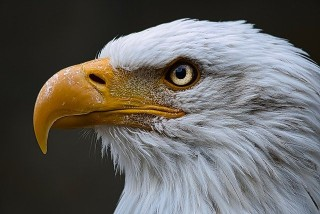

横方向検知　[閾値表示|全体表示]


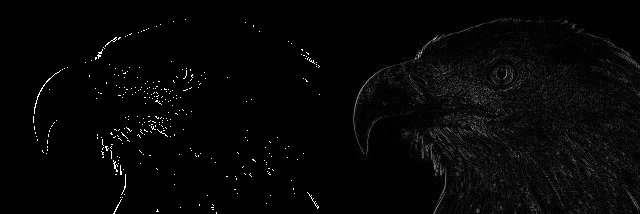

縦方向検知　[閾値表示|全体表示]


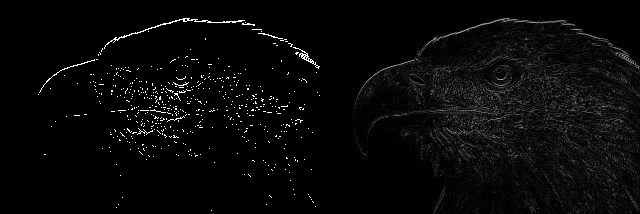

横,縦 合成　[閾値表示|全体表示]


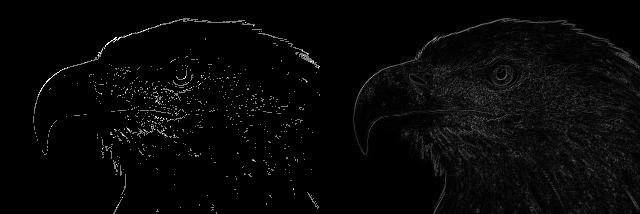

In [26]:
import cv2
import glob
from google.colab.patches import cv2_imshow
import sys
import numpy as np

def Horizontal_detection(img, th, h, w):
  img_edge1 = np.zeros( (h, w), np.uint8 )
  img_edge2 = np.zeros( (h, w), np.uint8 )
  for iy in range(h):
    for ix in range(w-1):
      dif = np.int32(img[iy,ix+1]) - np.int32(img[iy,ix])
      if np.abs(dif) >= th:
        img_edge1[iy,ix+1] = 255
      img_edge2[iy,ix+1] = np.abs(dif) #光量調節
  return img_edge1, img_edge2

def Vertical_detection(img, th, h, w):
  img_edge1 = np.zeros( (h, w), np.uint8 )
  img_edge2 = np.zeros( (h, w), np.uint8 )
  for ix in range(w):
    for iy in range(h-1):
      dif = np.int32(img[iy+1,ix]) - np.int32(img[iy,ix])
      if np.abs(dif) >= th:
        img_edge1[iy+1,ix] = 255
      img_edge2[iy+1,ix] = np.abs(dif) #光量調節
  return img_edge1, img_edge2


# 項目表示
file_list = glob.glob("*.jpg")
print(f'●{len(file_list)}個のファイルがあります．')
for file in file_list:
  print(f'{file}' )
print()

# ファイル名入力
fname = input("●上記のファイルの中から分析したい画像を1つ選んでください(拡張子込み)：")
img = cv2.imread(fname)
if img is None:
  sys.exit("エラー: ファイルを開けませんでした")
print()

h = img.shape[0]
w = img.shape[1]
img_gray = cv2.cvtColor( img, cv2.COLOR_BGR2GRAY )

# 数値入力
print("●境界線調査の閾値を入力してください．")
while True:
  edge = int(input("0[低]～255[高]："))
  if 0 <= edge <= 255:
    break
  else:
    print("正しい値を入力してください．")
print()
print("●検知する方向を選択してください．")
while True:
  dx = int(input("横方向検知 [0:しない|1:する]："))
  dy = int(input("縦方向検知 [0:しない|1:する]："))
  if (dx==0 or dx==1) and (dy==0 or dy==1):
    break
  else:
    print("正しい値を入力してください．")
print()

# 計算・出力表示
print("オリジナル")
cv2_imshow(img)
if dx==1:
  img_dx1,img_dx2 = Horizontal_detection(img_gray, edge, h, w)
  print("横方向検知　[閾値表示|全体表示]")
  img_h = cv2.hconcat([img_dx1, img_dx2])
  cv2.imwrite("data/dst/opencv_hconcat.jpg", img_h)
  cv2_imshow(img_h)
if dy==1:
  img_dy1,img_dy2 = Vertical_detection(img_gray, edge, h, w)
  print("縦方向検知　[閾値表示|全体表示]")
  img_h = cv2.hconcat([img_dy1, img_dy2])
  cv2.imwrite("data/dst/opencv_hconcat.jpg", img_h)
  cv2_imshow(img_h)
if dx==1 and dy==1:
  img_compo1 = np.zeros( (h, w), np.uint8 )
  img_compo2 = np.zeros( (h, w), np.uint8 )
  for iy in range(h):
    for ix in range(w):
      p = 0.5*img_dx1[iy,ix] + 0.5*img_dy1[iy,ix]
      img_compo1[iy,ix] = np.uint8(p)
  for iy in range(h):
    for ix in range(w):
      p = 0.5*img_dx2[iy,ix] + 0.5*img_dy2[iy,ix]
      img_compo2[iy,ix] = np.uint8(p) #光量調節pに掛ける
  print("横,縦 合成　[閾値表示|全体表示]")
  img_h = cv2.hconcat([img_compo1, img_compo2])
  cv2.imwrite("data/dst/opencv_hconcat.jpg", img_h)
  cv2_imshow(img_h)
if dx==0 and dy==0:
  print("終了")
